In [10]:
# pip install import_ipynb

Found 902 files belonging to 5 classes.
Using 722 files for training.
Found 902 files belonging to 5 classes.
Using 180 files for validation.
6/6 [==============================] - 0s 12ms/step


C:\Users\riash\AppData\Local\Temp\ipykernel_18372\785024156.py:82: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3 = Axes3D(fig3)


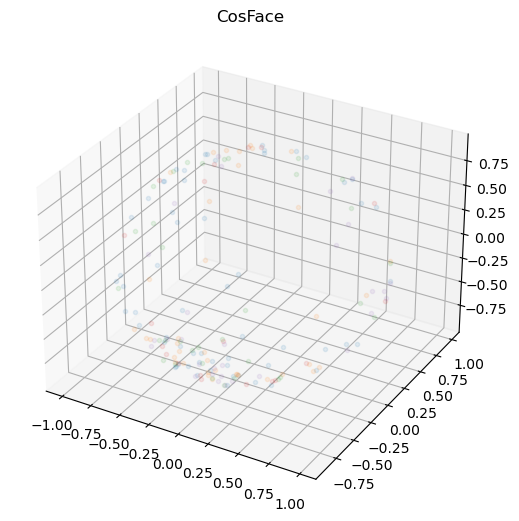

In [9]:
import time
import os
import math
import argparse
from glob import glob
from collections import OrderedDict
import random
import warnings
from datetime import datetime
import joblib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import numpy as np
import pandas as pd
import import_ipynb

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger, LearningRateScheduler

import archs
from metrics import *
from train import get_data


def main():
    # dataset
#     (X, y), (X_test, y_test) = mnist.load_data()
    (X, y), (X_test, y_test) = get_data()

    X = X[:, :, :, np.newaxis].astype('float32') / 255
    X_test = X_test[:, :, :, np.newaxis].astype('float32') / 255
    y_ohe = tensorflow.keras.utils.to_categorical(y, 10)
    y_ohe_test = tensorflow.keras.utils.to_categorical(y_test, 10)

    # feature extraction
#     softmax_model = load_model('models/faces_vgg8_3d/model.hdf5')
#     softmax_model = Model(inputs=softmax_model.input, outputs=softmax_model.layers[-2].output)
#     softmax_features = softmax_model.predict(X_test, verbose=1)
#     softmax_features /= np.linalg.norm(softmax_features, axis=1, keepdims=True)

    cosface_model = tensorflow.keras.models.load_model('models/faces_vgg8_3d/model.hdf5', custom_objects={'CosFace': CosFace})
    cosface_model = Model(inputs=cosface_model.inputs, outputs=cosface_model.layers[-3].output)
    cosface_features = cosface_model.predict(X_test, verbose=1)
    cosface_features /= np.linalg.norm(cosface_features, axis=1, keepdims=True)

#     arcface_model = load_model('models/faces_vgg8_arcface_3d/model.hdf5', custom_objects={'ArcFace': ArcFace})
#     arcface_model = Model(inputs=arcface_model.input[0], outputs=arcface_model.layers[-3].output)
#     arcface_features = arcface_model.predict(X_test, verbose=1)
#     arcface_features /= np.linalg.norm(arcface_features, axis=1, keepdims=True)

#     sphereface_model = load_model('models/faces_vgg8_sphereface_3d/model.hdf5', custom_objects={'SphereFace': SphereFace})
#     sphereface_model = Model(inputs=sphereface_model.input[0], outputs=sphereface_model.layers[-3].output)
#     sphereface_features = sphereface_model.predict(X_test, verbose=1)
#     sphereface_features /= np.linalg.norm(sphereface_features, axis=1, keepdims=True)

    # plot
#     fig1 = plt.figure()
#     ax1 = Axes3D(fig1)
#     for c in range(len(np.unique(y_test))):
#         ax1.plot(softmax_features[y_test==c, 0], softmax_features[y_test==c, 1], softmax_features[y_test==c, 2], '.', alpha=0.1)
#     plt.title('Softmax')

#     fig2 = plt.figure()
#     ax2 = Axes3D(fig2)
#     for c in range(len(np.unique(y_test))):
#         ax2.plot(arcface_features[y_test==c, 0], arcface_features[y_test==c, 1], arcface_features[y_test==c, 2], '.', alpha=0.1)
#     plt.title('ArcFace')

    fig3 = plt.figure()
    ax3 = Axes3D(fig3)
    for c in range(len(np.unique(y_test))):
        ax3.plot(cosface_features[y_test==c, 0], cosface_features[y_test==c, 1], cosface_features[y_test==c, 2], '.', alpha=0.1)
    plt.title('CosFace')

#     fig4 = plt.figure()
#     ax4 = Axes3D(fig4)
#     for c in range(len(np.unique(y_test))):
#         ax4.plot(sphereface_features[y_test==c, 0], sphereface_features[y_test==c, 1], sphereface_features[y_test==c, 2], '.', alpha=0.1)
#     plt.title('SphereFace')

    plt.show()


if __name__ == '__main__':
    main()
